<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores_5600Ohms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [63]:
#Valor nominal ou do fabricante
R_ref= 5.6 #(kΩ)

In [64]:
##Exemplo: Medidas dos 100 resistores de 890 ± 5% (kΩ)

array_100 = [5.44,5.56,5.41,5.50,5.64,5.61,5.58,5.45,5.44,5.57,5.47,5.59,5.56,5.46,5.49,5.50,5.48,5.57,5.59,5.56,5.56,5.54,5.55,5.48,5.52,5.54,5.49,5.52,5.46,5.54,5.47,5.55,5.46,5.53,5.48,5.56,5.54,5.52,5.50,5.47,5.47,5.54,5.49,5.55,5.51,5.53,5.54,5.46,5.52,5.55,5.55,5.55,5.46,5.53,5.54,5.48,5.51,5.57,5.55,5.57,5.59,5.51,5.48,5.54,5.56,5.54,5.55,5.47,5.52,5.51,5.51,5.53,5.47,5.52,5.48,5.54,5.55,5.50,5.51,5.47,5.51,5.57,5.51,5.48,5.52,5.51,5.59,5.51,5.46,5.55,5.51,5.53,5.52,5.46,5.47,5.53,5.55,5.52,5.46,5.51] #(k ohms)
array_GR01 = [5.44,5.56,5.41,5.50,5.64,5.61,5.58,5.45,5.44,5.57,5.47,5.59,5.56,5.46,5.49,5.50,5.48,5.57,5.59,5.56] #(k ohms)
array_GR02 = [5.56,5.54,5.55,5.48,5.52,5.54,5.49,5.52,5.46,5.54,5.47,5.55,5.46,5.53,5.48,5.56,5.54,5.52,5.50,5.47] #(k ohms)
array_GR03 = [5.47,5.54,5.49,5.55,5.51,5.53,5.54,5.46,5.52,5.55,5.55,5.55,5.46,5.53,5.54,5.48,5.51,5.57,5.55,5.57] #(k ohms)
array_GR04 = [5.59,5.51,5.48,5.54,5.56,5.54,5.55,5.47,5.52,5.51,5.51,5.53,5.47,5.52,5.48,5.54,5.55,5.50,5.51,5.47] #(k ohms)
array_GR05 = [5.51,5.57,5.51,5.48,5.52,5.51,5.59,5.51,5.46,5.55,5.51,5.53,5.52,5.46,5.47,5.53,5.55,5.52,5.46,5.51] #(k ohms)


In [65]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [66]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

Conjunto completo de valores de resistências (100):

In [67]:
amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Valor mínimo: 5.41 (kΩ)
Valor máximo: 5.64 (kΩ)
Amplitude: 0.22999999999999954 (kΩ)


In [68]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 5.518399999999999 (kΩ)


In [69]:
#Usando o NumPy
np.mean( array_100 )

5.518399999999999

In [70]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 5.518399999999999 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

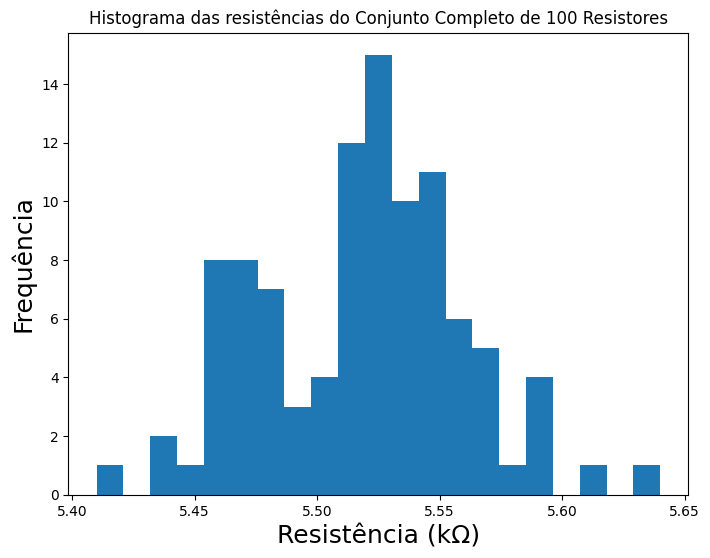

In [71]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [72]:
var_100 = np.var( array_100, ddof=0 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=0 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 0.0017734399999999964 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 0.042112231002405895 (kΩ)
Erro da média do conj. de 100: 0.004232438464234928 (kΩ)


Estimativa Padrão dos 100 resistores:

In [73]:
print ( "R100 = {:.3f} ± {:.3f} (kΩ)".format( np.round( np.mean( array_100 ), 3 ), np.round( sigma_m100, 3 ) ) )


R100 = 5.518 ± 0.004 (kΩ)


Grupo 01 de valores de resistências:

In [74]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 5.41 (kΩ)
Valor máximo: 5.64 (kΩ)
Amplitude: 0.22999999999999954 (kΩ)


In [75]:
#Usando o NumPy
np.mean( array_GR01 )

5.5235

In [76]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 5.5235 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

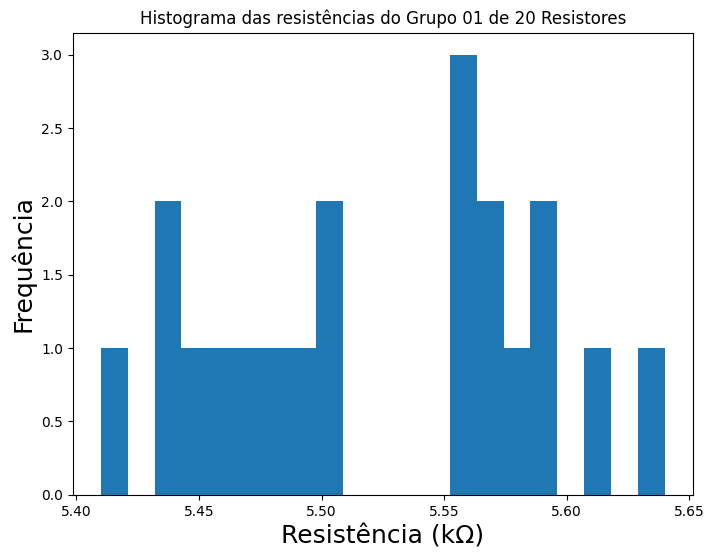

In [77]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [78]:
var_gr1 = np.var( array_GR01, ddof=1 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 0.004455526315789458 (k^2Ω)
Desvio Padrao do do Grupo 01: 0.06674972895667411 (kΩ)
Erro da média do Grupo 01: 0.014925693142680942 (kΩ)


Estimativa Padrão GR01:

In [79]:
print ( "R1 = {:.2f} ± {:.2f} (kΩ)".format( np.round( np.mean( array_GR01 ), 2 ), np.round( sigma_m1, 2 ) ) )


R1 = 5.52 ± 0.01 (kΩ)


Grupo 02 de valores de resistências:

In [80]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 5.46 (kΩ)
Valor máximo: 5.56 (kΩ)
Amplitude: 0.09999999999999964 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 5.514 (kΩ)


In [81]:
#Usando o NumPy
np.mean( array_GR02 )

5.514

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

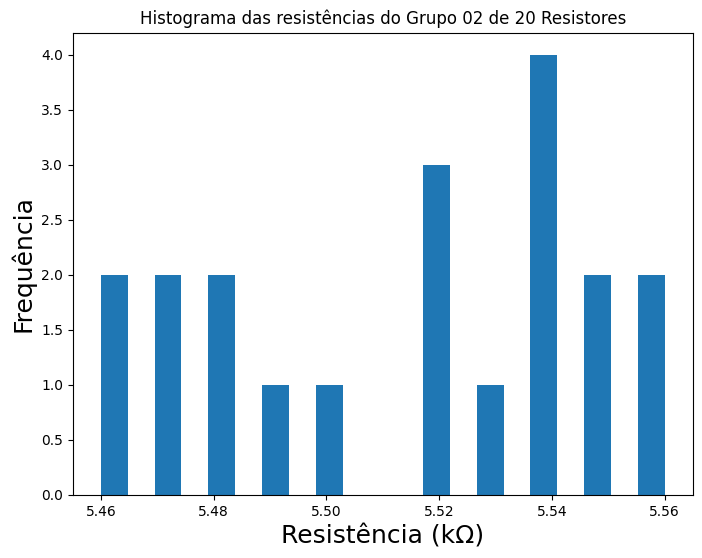

In [82]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [83]:
var_gr2 = np.var( array_GR02, ddof=1 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 0.0011936842105263097 (k^2Ω)
Desvio Padrao do do Grupo 02: 0.034549735317746064 (kΩ)
Erro da média do Grupo 02: 0.007725555677510549 (kΩ)


Estimativa Padrão GR02:

In [84]:
print ( "R2 = {:.2f} ± {:.2f} (kΩ)".format( np.round( np.mean( array_GR02 ), 2 ), np.round( sigma_m2, 2 ) ) )


R2 = 5.51 ± 0.01 (kΩ)


Grupo 03 de valores de resistências:

In [85]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 5.46 (kΩ)
Valor máximo: 5.57 (kΩ)
Amplitude: 0.11000000000000032 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 5.523500000000001 (kΩ)


In [86]:
#Usando o NumPy
np.mean( array_GR03 )

5.523500000000001

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

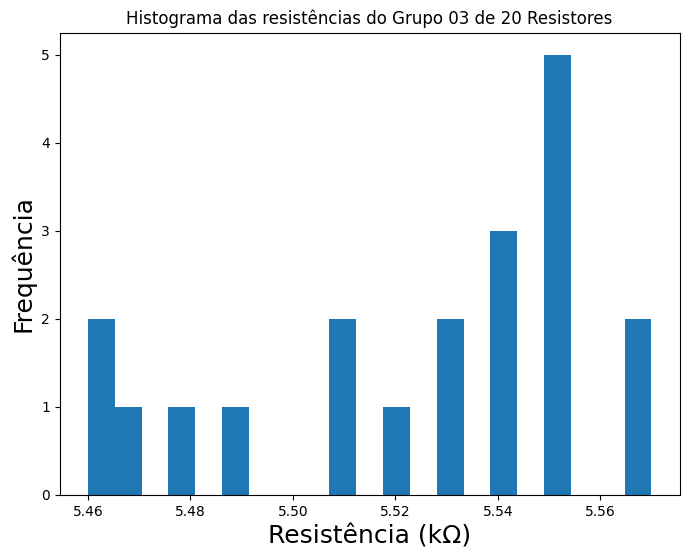

In [87]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [88]:
var_gr3 = np.var( array_GR03, ddof=1 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 0.0012134210526315796 (k^2Ω)
Desvio Padrao do do Grupo 03: 0.03483419372730736 (kΩ)
Erro da média do Grupo 03: 0.007789162511565602 (kΩ)


Estimativa Padrão GR03:

In [89]:
print ( "R3 = {:.2f} ± {:.2f} (kΩ)".format( np.round( np.mean( array_GR03 ), 2 ), np.round( sigma_m3, 2 ) ) )


R3 = 5.52 ± 0.01 (kΩ)


Grupo 04 de valores de resistências:

In [90]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 5.47 (kΩ)
Valor máximo: 5.59 (kΩ)
Amplitude: 0.1200000000000001 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 5.5175 (kΩ)


In [91]:
#Usando o NumPy
np.mean( array_GR04 )

5.5175

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

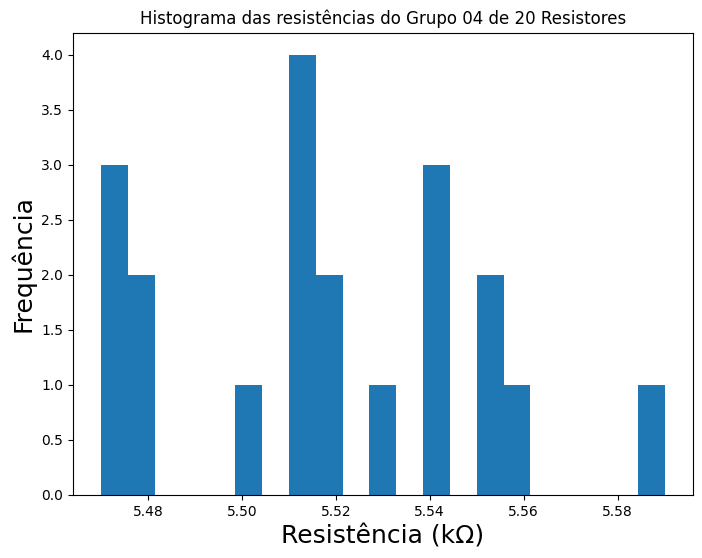

In [92]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [93]:
var_gr4 = np.var( array_GR04, ddof=1 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 0.0011039473684210498 (k^2Ω)
Desvio Padrao do do Grupo 04: 0.03322570343004117 (kΩ)
Erro da média do Grupo 04: 0.007429493146981998 (kΩ)


Estimativa Padrão GR04:

In [94]:
print ( "R4 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 6 ± 0 (kΩ)


Grupo 05 de valores de resistências:


In [95]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 5.46 (kΩ)
Valor máximo: 5.59 (kΩ)
Amplitude: 0.1299999999999999 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 5.5135 (kΩ)


In [96]:
#Usando o NumPy
np.mean( array_GR05 )

5.5135

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

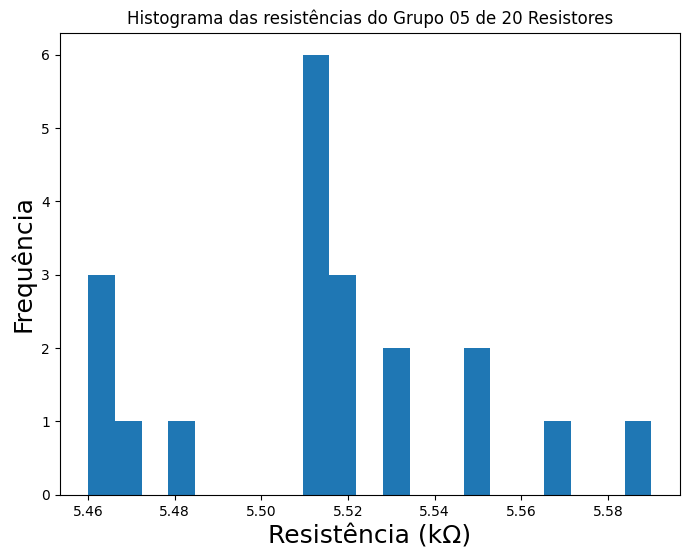

In [97]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [98]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 0.0012660526315789473 (k^2Ω)
Desvio Padrao do do Grupo 05: 0.035581633346137266 (kΩ)
Erro da média do Grupo 05: 0.007956295091243622 (kΩ)


Estimativa Padrão GR05:


In [99]:
print ( "R5 = {:.2f} ± {:.2f} (kΩ)".format( np.round( np.mean( array_GR05 ), 2 ), np.round( sigma_m5, 2) ) )


R5 = 5.51 ± 0.01 (kΩ)


Média das Médias:

In [100]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [101]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 5.5135 (kΩ)
Valor máximo: 5.523500000000001 (kΩ)
Amplitude: 0.010000000000001563 (kΩ)
média do conjunto das médias das resistências: 5.5184000000000015 (kΩ)


In [102]:
#Usando o NumPy
np.mean( array_GRM )

5.5184000000000015

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

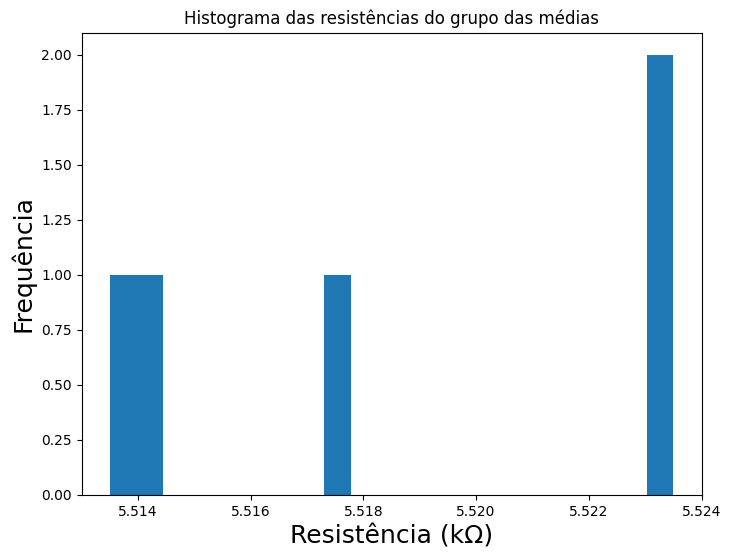

In [103]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [104]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 2.405000000000416e-05 (k^2Ω)
Desvio Padrao do do Grupo das médias: 0.004904079934096115 (kΩ)
Erro da média do Grupo das médias: 0.00219317121994632 (kΩ)


Estimativa padrão do grupo das médias:

In [105]:
print ( "RM = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GRM ), 1 ), np.round( sigma_m, 1 ) ) )


RM = 6 ± 0 (kΩ)


Desvio Padrão do conjunto com 100 resistores:


In [106]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 0.042112231002405895
Desvio padrão amostral (kΩ) = 0.042324384642349284


Erro Relativo:

In [107]:
erro_relativo100 = sigma_m100 / media_100
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100*100 ),"(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1*100  ),"(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2*100  ),"(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3*100  ),"(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4*100  ),"(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5*100  ),"(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM*100  ),"(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.07631239308931194 (kΩ)
Erro relativo das medidas do grupo 1 = 0.2702216555206109 (kΩ)
Erro relativo das medidas do grupo 2 = 0.14010801011081878 (kΩ)
Erro relativo das medidas do grupo 3 = 0.14101860254486467 (kΩ)
Erro relativo das medidas do grupo 4 = 0.1346532514178885 (kΩ)
Erro relativo das medidas do grupo 5 = 0.1443057058355604 (kΩ)
Erro relativo das medidas do grupo das médias = 0.03974288235623223 (kΩ)


Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [108]:
erro_r1 = sigma_m1/sigma_m100 
print ( "Razão do sigma_m1/sigma_m100   = {}".format( np.round(erro_r1 ),2) )

erro_r2 = sigma_m2/sigma_m100  
print ( "Razão do sigma_m2/sigma_m100   = {}".format( np.round(erro_r2 ) ,2))

erro_r3 = sigma_m3/sigma_m100 
print ( "Razão do sigma_m3/sigma_m100   = {}".format(np.round( erro_r3 ),2 ))

erro_r4 = sigma_m4/sigma_m100 
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100 
print ( "Razão do sigma_m5/sigma_m100   = {}".format( np.round(erro_r5 ),2) )

Razão do sigma_m1/sigma_m100   = 4.0
Razão do sigma_m2/sigma_m100   = 2.0
Razão do sigma_m3/sigma_m100   = 2.0
Razão do sigma_m4/sigma_m100   = 1.7642126693685614
Razão do sigma_m5/sigma_m100   = 2.0


In [109]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 19.37679340601521 0.004211223100240589 0.08160000000000078
O grupo de 100 é ou não compatível com o R de ref.: 19.37679340601521


In [110]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Compatível 0.3288538727380287 0.015508407906341413 0.005100000000001437
O grupo 01 é  ou não compatível com o grupo de 100: 0.3288538727380287


In [111]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Compatível 0.5000690660692112 0.008798784605064239 0.004399999999998627
O grupo 02 é  ou não compatível com o grupo de 100: 0.5000690660692112


In [112]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 0.5759662595487124 0.008854685349100718 0.005100000000002325
O grupo 03 é  ou não compatível com o grupo de 100: 0.5759662595487124


In [113]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Compatível 0.10538629517739118 0.008540009860711663 0.0008999999999987907
O grupo 04 é  ou não compatível com o grupo de 100: 0.10538629517739118


In [114]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Compatível 0.5443200325496885 0.00900205707485502 0.004899999999999238
O grupo 05 é  ou não compatível com o grupo de 100: 0.5443200325496885


In [115]:
#Funções

def estimativasGerais(grupo):
  print (f"Média {np.average(grupo)}")
  print (f"Desvio Padrão NP {np.std(grupo)}")
  print (f"Desvio Padrão {desvioPadrao(grupo)}")
  print (f"Desvio Padrão Experimental {desvioPadraoExp(grupo)}")
  print (f"Desvio Padrão EXp NP {np.std(grupo, ddof = 1)}")


def plotaGrafrico(grupo):
    plt.hist(grupo, bins=20, range=[664,684])
    plt.xlabel('resistência (Ω)')
    plt.ylabel('frequência')
    plt.title('Histograma')
    plt.show()

def erroDaMedia(grupo):
  # ox = np.std(grupo)/np.sqrt(len(grupo))
  ox = desvioPadraoExp(grupo)/np.sqrt(len(grupo))
  return(ox)


def calculaEstimativa(grupo): 
  print(f"x = {np.average(grupo)} ± {erroDaMedia(grupo):.2f} kΩ")

def erroRelativo(grupo):
  erroRelativo = (erroDaMedia(grupo)/abs(np.average(grupo)))
  print(f"{erroRelativo*100}%")

def desvioPadraoExp(grupo):
  sx = 0
  for elemento in grupo:
      sx += ((elemento - np.average(grupo))**2)/(len(grupo)-1)
  sx = np.sqrt(sx)
  return (sx)

def desvioPadrao(grupo):
  ox = 0
  for elemento in grupo:
      ox += ((elemento - np.average(grupo))**2)/(len(grupo))
  ox = np.sqrt(ox)
  return (ox)




In [116]:
calculaEstimativa(array_GR01)
calculaEstimativa(array_GR02)
calculaEstimativa(array_GR03)
calculaEstimativa(array_GR04)
calculaEstimativa(array_GR05)
calculaEstimativa(array_100)

x = 5.5235 ± 0.01 kΩ
x = 5.514 ± 0.01 kΩ
x = 5.523500000000001 ± 0.01 kΩ
x = 5.5175 ± 0.01 kΩ
x = 5.5135 ± 0.01 kΩ
x = 5.518399999999999 ± 0.00 kΩ


In [117]:
erroRelativo(array_GR01)
erroRelativo(array_GR02)
erroRelativo(array_GR03)
erroRelativo(array_GR04)
erroRelativo(array_GR05)
erroRelativo(array_100)

0.2702216555206109%
0.14010801011081878%
0.14101860254486467%
0.1346532514178885%
0.1443057058355604%
0.07669684082768427%


In [120]:
print(f"Grupo 1: {np.std(array_GR01, ddof=1):.2f} kΩ")
print(f"Grupo 2: {np.std(array_GR02, ddof=1):.2f} kΩ")
print(f"Grupo 3: {np.std(array_GR03, ddof=1):.2f} kΩ")
print(f"Grupo 4: {np.std(array_GR04, ddof=1):.2f} kΩ")
print(f"Grupo 5: {np.std(array_GR05, ddof=1):.2f} kΩ")
print(f"Conjunto completo: {np.std(array_100, ddof=0):.2f} kΩ")

Grupo 1: 0.07 kΩ
Grupo 2: 0.03 kΩ
Grupo 3: 0.03 kΩ
Grupo 4: 0.03 kΩ
Grupo 5: 0.04 kΩ
Conjunto completo: 0.04 kΩ


In [119]:
print(f"Grupo 1: {erroDaMedia(array_GR01):.2f} kΩ")
print(f"Grupo 2: {erroDaMedia(array_GR02):.2f} kΩ")
print(f"Grupo 3: {erroDaMedia(array_GR03):.2f} kΩ")
print(f"Grupo 4: {erroDaMedia(array_GR04):.2f} kΩ")
print(f"Grupo 5: {erroDaMedia(array_GR05):.2f} kΩ")
print(f"Conjunto completo: {erroDaMedia(array_100):.4f} kΩ")

Grupo 1: 0.01 kΩ
Grupo 2: 0.01 kΩ
Grupo 3: 0.01 kΩ
Grupo 4: 0.01 kΩ
Grupo 5: 0.01 kΩ
Conjunto completo: 0.0042 kΩ
